$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 6: Neural Networks

*Type your name here and rewrite all of the following sections.  Add more sections to present your code, results, and discussions.*

## Overview

You will write and apply code that trains neural networks of various numbers of hidden layers and units in each hidden layer and returns results as specified below.  You will do this once for a regression problem and once for a classification problem. 

## Required Code

Download [nn2.tar](http://www.cs.colostate.edu/~anderson/cs440/notebooks/nn2.tar) that was used in lecture and extract its contents, which are

* `neuralnetworks.py`
* `scaledconjugategradient.py`
* `mlutils.py`

Write the following functions that train and evaluate neural network models.

* `results = trainNNs(X, T, trainFraction, hiddenLayerStructures, numberRepetitions, numberIterations, classify)`

The arguments to `trainNNs` are

* `X` is a matrix of input data of shape `nSamples x nFeatures`
* `T` is a matrix of target data of shape `nSamples x nOutputs`
* `trainFraction` is fraction of samples to use as training data. 1-`trainFraction` is number of samples for testing data
* `hiddenLayerStructures` is list of network architectures. For example, to test two networks, one with one hidden layer of 20 units, and one with 3 hidden layers with 5, 10, and 20 units in each layer, this argument would be `[[20], [5, 10, 20]]`.
* `numberRepetitions` is number of times to train a neural network.  Calculate training and testing average performance (two separate averages) of this many training runs.
* `numberIterations` is the number of iterations to run the scaled conjugate gradient algorithm when a neural network is trained.
* `classify` is set to `True` if you are doing a classification problem, in which case `T` must be a single column of target class integers.

This function returns `results` which is list with one element for each network structure tested.  Each element is a list containing 

* the hidden layer structure (as a list),
* a list of training data performance for each repetition, 
* a list of testing data performance for each repetition, and
* the number of seconds it took to run this many repetitions for this network structure.

This function should follow these steps:

  * For each network structure given in `hiddenLayerStructures`
    * For numberRepetitions
      * Use `ml.partition` to randomly partition X and T into training and testing sets.
      * Create a neural network of the given structure
      * Train it for numberIterations
      * Use the trained network to produce outputs for the training and for the testing sets
      * If classifying, calculate the fraction of samples incorrectly classified for training and testing sets.
       Otherwise, calculate the RMSE of training and testing sets.
      * Add the training and testing performance to a collection (such as a list) for this network structure
    * Add to a collection of all results the hidden layer structure, lists of training performance and testing performance, and seconds taken to do these repetitions.
  * return the collection of all results

Also write the following two functions. `summarize(results)` returns a list of lists like `results` but with the list of training performances replaced by their mean and the list of testing performances replaced by their mean.   
`bestNetwork(summary)` takes the output of `summarize(results)` and returns the best element of `results`, determined by the element that has the smallest test performance.

* `summary = summarize(results)` where `results` is returned by `trainNNs` and `summary` is like `results` with the training and testing performance lists replaced by their means
* `best = bestNetwork(summary)` where `summary` is returned by `summarize` and `best` is the best element of `summary`

In [93]:
B=np.array([[2,3,3],[5,5,6]])
B.shape[0]

2

In [42]:
Z=ml.partition(X,T,(0.8, 1-0.8))
print (Z[0],'.......', Z[1],'.......',Z[2],'.......',Z[3])

[[1]
 [9]
 [6]
 [0]
 [5]
 [4]
 [7]
 [3]] ....... [[  2.45518616]
 [ 10.23474948]
 [  7.94133545]
 [  0.67668256]
 [  6.60128361]
 [  4.3516421 ]
 [  8.84205266]
 [  4.10088548]] ....... [[2]
 [8]] ....... [[ 2.91822383]
 [ 9.1152954 ]]


In [125]:
def trainNNs(X, T,trainFraction,hiddenLayerStructures,numberRepetitions,numberIterations, classify): 
    results=[]
    #For each network structure given in `hiddenLayerStructures`
    for  hiddenLayer in hiddenLayerStructures:
        #For numberRepetitions
        startTime = time.time()
        performanceTrain=[]
        performanceTest=[]
        for  rep in range(numberRepetitions):
            
            
            #print ("rep",rep)
            #Use `ml.partition` to randomly partition X and T into training and testing sets.
            fractions=(trainFraction,1-trainFraction)
            
            ##W/ CLASSIFY?????? -->  Xtest and Ttest are empty##
            Z=ml.partition(X,T,fractions, classify)
            Xtrain=Z[0] #Train input
            Ttrain=Z[1] #Train expected result
            Xtest=Z[2]  #Test input
            Ttest=Z[3]  #Test expected result

            
            
            
            #If classifying 
            if classify:
                incorrect=0

                ###****When classifying, the number of outputs is the number of unique values in T.***##
                number_of_classes=len(np.unique(T))
                print (",number_of_classes", number_of_classes)
                
                #Create a neural network of the given structure
                nnet = nn.NeuralNetwork(Xtrain.shape[1], hiddenLayer,number_of_classes)
                #Train it for numberIterations
                nnet.train(Xtrain, Ttrain, numberIterations)
                #Use the trained network to produce outputs for the training and for the testing sets
                res=nnet.use(Xtrain)
                
                #calculate the fraction of samples incorrectly classified for training and 
                #testing sets. 
                
                #Done by comparing out of the use() method with the target labels in T.
                #for sample in range(len(res)):
                 #   if res[sample]!=Ttest[sample]:
                  #      incorrect+=1
                
            else:
                #Create a neural network of the given structure
                nnet = nn.NeuralNetwork(Xtrain.shape[1], hiddenLayer,Ttrain.shape[1] )
                #Train it for numberIterations
                nnet.train(Xtrain, Ttrain, numberIterations)
                #Use the trained network to produce outputs for the training and for the testing sets
                resTrain=nnet.use(Xtrain)
                resTest=nnet.use(Xtest)
                #Calculate the RMSE of training and testing sets.
                rmseTrain = np.sqrt(((np.array(resTrain) - np.array(Ttrain)) ** 2).mean())
                rmseTest = np.sqrt(((np.array(resTest) - np.array(Ttest)) ** 2).mean())
               
                
                #Add the training and testing performance to a collection 
                #(such as a list) for this network structure
                performanceTrain.append(rmseTrain)
                performanceTest.append(rmseTest)
        
        endTime = time.time() 
        timeRepetition= endTime-startTime
        results.append([hiddenLayer,performanceTrain,performanceTest, timeRepetition])

    return results
results = trainNNs(X, T, 0.8, [2, 10, [10, 10]], 5, 100, classify=False)
results

[[2,
  [0.35201511087328102,
   0.27100358126559809,
   0.40733264150957277,
   0.43107478933085047,
   0.25429695633679011],
  [1.3280378169410145,
   0.49545913671961123,
   0.69860320998077963,
   0.74361285585570847,
   0.75373942383036474],
  0.5155048370361328],
 [10,
  [0.18414339455113046,
   0.10402323615590869,
   0.30087014488569414,
   0.22941155954913078,
   0.17314860615634881],
  [0.7464935070230645,
   0.68862828527158582,
   0.424719010706819,
   0.54406679971485716,
   0.6936716456043478],
  0.6664097309112549],
 [[10, 10],
  [0.35281506400260781,
   0.12627702775981497,
   0.15012163434373355,
   0.24885489338895872,
   0.098327900231392082],
  [0.16703022222859021,
   0.63999736504853744,
   1.1717815055294851,
   0.7825415379232854,
   2.1670095846270501],
  0.7458846569061279]]

## Sumarize

summarize(results) returns a list of lists like results but with the list of training performances replaced by their mean and the list of testing performances replaced by their mean.

In [148]:
def summarize(results):
    sumarizedResults=[]
    trainMean=0
    testMean=0
    for i in range(len(results)):
        trainMean=np.mean(results[i][1])
        testMean=np.mean(results[i][2])
        sumarizedResults.append([results[i][0],trainMean,testMean,results[i][3]])
    
    
    return sumarizedResults


results = trainNNs(X, T, 0.8, [2, 10, [10, 10]], 5, 100, classify=False)

summary= summarize(results)
summary

[[2, 0.2977782002591437, 0.31937988305247911, 0.6761143207550049],
 [10, 0.039018788989425998, 0.066298301519722963, 0.7800688743591309],
 [[10, 10], 0.037487801824259079, 0.066236399898398496, 1.1216838359832764]]

##  bestNetwork

 takes the output of summarize(results) and returns the best element of results, determined by the element that has the smallest test performance.

In [152]:
def bestNetwork(summary) :

    best=[]
    lowestTestMean=0
    bestElement=[]
    
    for i in range(len(summary)):
        if i==0:
            lowestTestMean=summary[i][2]
            best=summary[i]
        else:
            if summary[i][2]<lowestTestMean:
                lowestTestMean=summary[i][2]
                best=summary[i]

    
    return best
best=bestNetwork(summary)
best

[[10, 10], 0.037487801824259079, 0.066236399898398496, 1.1216838359832764]

## Examples


In [116]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import mlutils as ml
import neuralnetworks as nn

X = np.arange(10).reshape((-1,1))
T = X + 1 + np.random.uniform(-1, 1, ((10,1)))


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

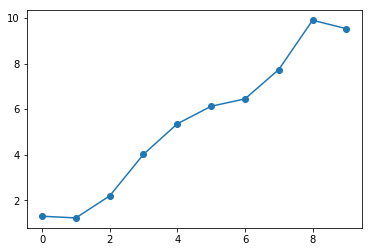

In [16]:
plt.plot(X, T, 'o-');

In [30]:
print (T.shape[])

10


In [16]:
import neuralnetworks as nn
nnet = nn.NeuralNetwork(X.shape[1], 2, T.shape[1])
nnet.train(X, T, 100)
nnet.getErrorTrace()

array([ 0.70710678,  0.1715102 ,  0.10432129,  0.1009716 ,  0.09991516,
        0.09516955,  0.09443213,  0.0940382 ,  0.09383569,  0.09370982,
        0.09273958,  0.090802  ,  0.09071461,  0.09052072,  0.09051801,
        0.09051584,  0.09045248,  0.09043471,  0.09042614,  0.09040963,
        0.09040445,  0.09039888,  0.09039668,  0.09039105,  0.09036012,
        0.09036009,  0.09036003,  0.09035909,  0.09035868,  0.09035854,
        0.09035726,  0.09035522,  0.09035287,  0.0903488 ,  0.09034846,
        0.09034754,  0.09034676,  0.09034634,  0.09034071,  0.09034034,
        0.09033639,  0.09033215,  0.09033088,  0.09033023,  0.09032877,
        0.0903202 ,  0.09032008,  0.09031947,  0.09031846,  0.09031781,
        0.09031747,  0.09031347,  0.09031241,  0.09030795,  0.09030476,
        0.09030374,  0.0903033 ,  0.09030295,  0.09030206,  0.09029695,
        0.09029672,  0.09029553,  0.09029391,  0.09029202,  0.09029088,
        0.09028346,  0.09028154,  0.0902804 ,  0.0902804 ,  0.09

In [23]:
nnet = nn.NeuralNetwork(X.shape[1], [5, 5, 5], T.shape[1])
nnet.train(X, T, 100)
nnet.getErrorTrace()

array([ 0.70710678,  0.33087077,  0.29785104,  0.2924372 ,  0.28702722,
        0.22429102,  0.12072636,  0.11612377,  0.11313081,  0.11228215,
        0.11164296,  0.10927478,  0.10130768,  0.09520489,  0.09426636,
        0.09407747,  0.09404471,  0.09402459,  0.09391286,  0.09369258,
        0.09340573,  0.09336943,  0.09335763,  0.09335376,  0.09334088,
        0.0932202 ,  0.09286827,  0.09239899,  0.09228483,  0.09224468,
        0.09211939,  0.09209087,  0.09157514,  0.09149368,  0.09079426,
        0.0907807 ,  0.0893338 ,  0.08920287,  0.08897366,  0.08893466,
        0.0888663 ,  0.08879868,  0.08856546,  0.08856099,  0.08855363,
        0.0885339 ,  0.08799392,  0.08751992,  0.08751021,  0.0870519 ,
        0.08672257,  0.08667538,  0.08637161,  0.08634123,  0.08630521,
        0.0861791 ,  0.08617438,  0.08615744,  0.08612208,  0.08611725,
        0.08606688,  0.08604412,  0.08602298,  0.08587327,  0.08572364,
        0.08566763,  0.08561603,  0.08488089,  0.08460389,  0.08

In [20]:
results = trainNNs(X, T, 0.8, [2, 10, [10, 10]], 5, 100, classify=False)
results

rep 0
Q [[  9.05213124]
 [  2.21043828]
 [  6.2347206 ]
 [  3.84765289]
 [  4.82727488]
 [  3.10809389]
 [ 10.13529616]
 [  0.76538943]]
rep 1
Q [[  6.34504667]
 [  4.77902748]
 [  8.95925431]
 [  3.0132528 ]
 [  7.90146522]
 [ 10.15205082]
 [  3.70783346]
 [  2.50255425]]
rep 2
Q [[ 6.41810403]
 [ 3.74595643]
 [ 8.76669361]
 [ 3.20124011]
 [ 8.09701213]
 [ 4.6250596 ]
 [ 2.32661314]
 [ 0.70347884]]
rep 3
Q [[ 10.05176449]
 [  8.81645438]
 [  3.65006342]
 [  9.51096282]
 [  3.0090683 ]
 [  7.77637018]
 [  2.55026088]
 [  4.68382748]]
rep 4
Q [[ 10.26207265]
 [  3.82136121]
 [  5.09077831]
 [  8.83964876]
 [  7.7257234 ]
 [  6.43465755]
 [  1.82871261]
 [  1.14726529]]
rep 0
Q [[  2.11518318]
 [  6.62928882]
 [  9.32754899]
 [  2.97919729]
 [ 10.02667675]
 [  8.8049303 ]
 [  4.26500209]
 [  0.89531234]]
rep 1
Q [[  9.26764977]
 [  6.49777455]
 [  3.12929872]
 [ 10.1594455 ]
 [  4.50449919]
 [  7.89479651]
 [  3.82819197]
 [  0.66235672]]
rep 2
Q [[  2.50363702]
 [ 10.18445109]
 [  9.316

In [108]:
results = trainNNs(X, T, 0.8, [0, 1, 2, 10, [10, 10], [5, 5, 5, 5], [2]*5], 50, 400, classify=False)

rep 0
rmseTrain 0.454617086795
rmseTest 0.367760136981
rep 1
rmseTrain 0.368152214381
rmseTest 0.760432861988
rep 2
rmseTrain 0.417829295092
rmseTest 0.509553327902
rep 3
rmseTrain 0.464103122364
rmseTest 0.33776703009
rep 4
rmseTrain 0.47460339774
rmseTest 0.298063054872
rep 5
rmseTrain 0.314709624576
rmseTest 0.75540408209
rep 6
rmseTrain 0.458721743347
rmseTest 0.37099542603
rep 7
rmseTrain 0.458431436599
rmseTest 0.355164675337
rep 8
rmseTrain 0.344920266298
rmseTest 0.702432901723
rep 9
rmseTrain 0.314709624576
rmseTest 0.75540408209
rep 10
rmseTrain 0.448447888718
rmseTest 0.457353890333
rep 11
rmseTrain 0.39797253047
rmseTest 0.638608796569
rep 12
rmseTrain 0.314709624576
rmseTest 0.755404082192
rep 13
rmseTrain 0.466659266037
rmseTest 0.407325935356
rep 14
rmseTrain 0.39797253047
rmseTest 0.638608796569
rep 15
rmseTrain 0.448363706505
rmseTest 0.413725887183
rep 16
rmseTrain 0.464103122364
rmseTest 0.337767030022
rep 17
rmseTrain 0.464518626976
rmseTest 0.341709382986
rep 18
rm

rmseTrain 0.278390464038
rmseTest 0.759371682887
rep 49
rmseTrain 0.190012104646
rmseTest 0.63503059305
rep 0
rmseTrain 7.87007768936e-07
rmseTest 1.49637283515
rep 1
rmseTrain 7.00733782688e-07
rmseTest 1.1999766929
rep 2
rmseTrain 0.0140828231363
rmseTest 0.614189281993
rep 3
rmseTrain 0.0311975090057
rmseTest 0.851234045355
rep 4
rmseTrain 5.82106311218e-07
rmseTest 0.709392545686
rep 5
rmseTrain 2.24613939529e-07
rmseTest 2.06618670746
rep 6
rmseTrain 0.0096965265577
rmseTest 1.5195242434
rep 7
rmseTrain 2.14526258099e-07
rmseTest 1.30509583942
rep 8
rmseTrain 0.0739668207889
rmseTest 1.07991531491
rep 9
rmseTrain 0.000745966961227
rmseTest 0.508385529173
rep 10
rmseTrain 3.1335348656e-07
rmseTest 0.926812551174
rep 11
rmseTrain 1.395940158e-07
rmseTest 1.15839696847
rep 12
rmseTrain 1.89129089224e-07
rmseTest 0.707422939907
rep 13
rmseTrain 0.0600272742496
rmseTest 0.533468342389
rep 14
rmseTrain 1.22523393353e-07
rmseTest 0.836073375205
rep 15
rmseTrain 0.0714900328771
rmseTest 0

rmseTrain 0.140294404001
rmseTest 0.75655140605
rep 43
rmseTrain 0.147011923178
rmseTest 0.512217515442
rep 44
rmseTrain 0.10094927837
rmseTest 0.569701665143
rep 45
rmseTrain 0.0752439195048
rmseTest 0.77615114933
rep 46
rmseTrain 0.067813082189
rmseTest 2.34761279468
rep 47
rmseTrain 0.0438258223964
rmseTest 0.738582091371
rep 48
rmseTrain 0.0753172507525
rmseTest 1.14596966637
rep 49
rmseTrain 0.027631168806
rmseTest 0.57243361389
rep 0
rmseTrain 0.250284953551
rmseTest 1.22750661886
rep 1
rmseTrain 0.255572422896
rmseTest 0.783762011684
rep 2
rmseTrain 0.196717500801
rmseTest 0.712594584261
rep 3
rmseTrain 0.360672936016
rmseTest 0.346707667214
rep 4
rmseTrain 0.192045085144
rmseTest 0.710299675026
rep 5
rmseTrain 0.298912942123
rmseTest 1.14179722518
rep 6
rmseTrain 0.171600859513
rmseTest 0.910597120771
rep 7
rmseTrain 0.147908359775
rmseTest 1.12732399884
rep 8
rmseTrain 0.212965556957
rmseTest 0.790298393225
rep 9
rmseTrain 0.276074911944
rmseTest 0.457035177078
rep 10
rmseTrai

In [32]:
summarize(results)

[[0, 0.53143143920050495, 0.5755313396359012, 0.02525186538696289],
 [1, 0.41796988528870666, 0.8019628348277037, 0.48237133026123047],
 [2, 0.319301650214185, 0.79158629335178698, 3.0588934421539307],
 [10, 0.014479537325943773, 1.3689404089207877, 2.4029524326324463],
 [[10, 10], 0.0059205648354279314, 1.263934252184689, 3.949293613433838],
 [[5, 5, 5, 5], 0.10473467510155832, 1.193733162683511, 6.051068544387817],
 [[2, 2, 2, 2, 2],
  0.27347638907453148,
  0.93362462573994121,
  6.222663402557373]]

In [33]:
best = bestNetwork(summarize(results))
print(best)
print('Hidden Layers {} Average RMSE Training {:.2f} Testing {:.2f} Took {:.2f} seconds'.format(*best))

[0, 0.53143143920050495, 0.5755313396359012, 0.02525186538696289]
Hidden Layers 0 Average RMSE Training 0.53 Testing 0.58 Took 0.03 seconds


Hummm...neural nets with no hidden layers did best on this simple data set.  Why?  Remember what "best" means.

## Data for Regression Experiment

From the UCI Machine Learning Repository, download the [Appliances energy prediction](http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction) data.  You can do this by visiting the Data Folder for this data set, or just do this:

     !wget http://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv



Read this data into python.  One suggestion is to use the `loadtxt` function in the `numpy` package.  You may ignore the first column of each row which contains a data and time.  Also ignore the last two columns of random variables.  We will not use that in our modeling of this data.  You will also have to deal with the double quotes that surround every value in every field.  Read the first line of this file to get the names of the features.

Once you have read this in correctly, you should see values like this:

In [11]:
names

['Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint']

In [12]:
data.shape

(19735, 26)

In [13]:
data[:2,:]

array([[  60.        ,   30.        ,   19.89      ,   47.59666667,
          19.2       ,   44.79      ,   19.79      ,   44.73      ,
          19.        ,   45.56666667,   17.16666667,   55.2       ,
           7.02666667,   84.25666667,   17.2       ,   41.62666667,
          18.2       ,   48.9       ,   17.03333333,   45.53      ,
           6.6       ,  733.5       ,   92.        ,    7.        ,
          63.        ,    5.3       ],
       [  60.        ,   30.        ,   19.89      ,   46.69333333,
          19.2       ,   44.7225    ,   19.79      ,   44.79      ,
          19.        ,   45.9925    ,   17.16666667,   55.2       ,
           6.83333333,   84.06333333,   17.2       ,   41.56      ,
          18.2       ,   48.86333333,   17.06666667,   45.56      ,
           6.48333333,  733.6       ,   92.        ,    6.66666667,
          59.16666667,    5.2       ]])

Use the first two columns, labelled `Appliances` and `lights` as the target variables, and the remaining 24 columns as the input features.  So

In [14]:
Xenergy.shape, Tenergy.shape

((19735, 24), (19735, 2))

In [15]:
Xnames

['T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint']

In [16]:
Tnames

['Appliances', 'lights']

Train several neural networks on all of this data for 100 iterations.  Plot the error trace (nnet.getErrorTrace()) to help you decide now many iterations might be needed.  100 may not be enough.  If for your larger networks the error is still decreasing after 100 iterations you should train all nets for more than 100 iterations.

Now use your `trainNNs`, `summarize`, and `bestNetwork` functions on this data to investigate various network sizes.

In [18]:
results = trainNNs(Xenergy, Tenergy, 0.8, [0, 5, [5, 5], [10, 10]], 10, 100)

In [19]:
summarize(results)

[[0, 67.046960179422285, 67.644136371408763, 0.998682975769043],
 [5, 65.301632625880842, 66.328853488839485, 13.130361795425415],
 [[5, 5], 64.277382425810785, 66.416365860755761, 19.365249395370483],
 [[10, 10], 62.741905999268582, 64.979550044221469, 33.62221097946167]]

In [20]:
bestNetwork(summarize(results))

[[10, 10], 62.741905999268582, 64.979550044221469, 33.62221097946167]

Test at least 10 different hidden layer structures.  Larger numbers of layers and units may do the best on training data, but not on testing data. Why?

Now train another network with your best hidden layer structure on 0.8 of the data and use the trained network on the testing data (the remaining 0.2 of the date).  As before use `ml.partition` to produce the training and testing sets.

For the testing data, plot the predicted and actual `Appliances` energy use, and the predicted and actual `lights` energy use, in two separate plots.  Discuss what you see.

## Data for Classification Experiment

From the UCI Machine Learning Repository, download the [Anuran Calls (MFCCs)](http://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29) data.  You can do this by visiting the Data Folder for this data set, or just do this:

     !wget 'http://archive.ics.uci.edu/ml/machine-learning-databases/00406/Anuran Calls (MFCCs).zip'
     !unzip Anuran*zip
     
Read the data in the file `Frogs_MFCCs.csv` into python.  This will be a little tricky. Each line of the file is a sample of audio features plus three columns that label the sample by family, genus, and species. We will try to predict the species.  The tricky part is that the species is given as text.  We need to convert this to a target class, as an integer. The `numpy` function `unique` will come in handy here.

In [21]:
Xanuran.shape, Tanuran.shape

((7195, 21), (7195, 1))

In [22]:
Xanuran[:2,:]

array([[ 0.1529363 , -0.1055859 ,  0.20072191,  0.31720106,  0.26076385,
         0.10094464, -0.1500626 , -0.17112763,  0.12467644,  0.18865415,
        -0.07562172, -0.15643593,  0.08224512,  0.13575204, -0.02401665,
        -0.10835111, -0.07762252, -0.0095678 ,  0.05768398,  0.11868014,
         0.01403845],
       [ 0.17153426, -0.09897474,  0.26842522,  0.33867186,  0.2683531 ,
         0.06083509, -0.22247464, -0.20769267,  0.17088287,  0.27095828,
        -0.09500394, -0.25434147,  0.02278623,  0.1633201 ,  0.01202228,
        -0.09097401, -0.05650952, -0.03530336,  0.02013996,  0.08226299,
         0.02905574]])

In [23]:
Tanuran[:2]

array([[0],
       [0]])

In [24]:
for i in range(10):
    print('{} samples in class {}'.format(np.sum(Tanuran==i), i))

672 samples in class 0
3478 samples in class 1
542 samples in class 2
310 samples in class 3
472 samples in class 4
1121 samples in class 5
270 samples in class 6
114 samples in class 7
68 samples in class 8
148 samples in class 9


In [25]:
results = trainNNs(Xanuran, Tanuran, 0.8, [0, 5, [5, 5]], 5, 100, classify=True)

In [26]:
summarize(results)

[[0, 0.028179291174426684, 0.034885337039610845, 2.706338405609131],
 [5, 0.035267546907574707, 0.041000694927032663, 5.346082448959351],
 [[5, 5], 0.046699096594857534, 0.057956914523974987, 6.503756046295166]]

In [27]:
bestNetwork(summarize(results))

[0, 0.028179291174426684, 0.034885337039610845, 2.706338405609131]

Now do an investigation like you did for the regression data. 

Test at least 10 different hidden layer structures. Then train another network with your best hidden layer structure on 0.8 of the data and use the trained network on the testing data (the remaining 0.2 of the date). 

Plot the predicted and actual `Species` for the testing data as an integer.  Discuss what you see.

## Grading

Download [A6grader.tar](http://www.cs.colostate.edu/~anderson/cs440/notebooks/A6grader.tar) and extract `A6grader.py` from it.

In [153]:
%run -i "A6grader.py"


Testing summarize([[[1,1], [1.2, 1.3, 1.4], [2.2, 2.3, 2.4], 0.5], [[2,2,2], [4.4, 4.3, 4.2], [6.5, 6.4, 6.3], 0.6]])

--- 10/10 points. Correctly returned [[[1, 1], 1.3, 2.3000000000000003, 0.5], [[2, 2, 2], 4.2999999999999998, 6.3999999999999995, 0.6]]

Testing bestNetwork([[[1, 1], 1.3, 2.3, 0.5], [[2, 2, 2], 4.3, 1.3, 0.6]])

--- 10/10 points. Correctly returned [[2, 2, 2], 4.3, 1.3, 0.6]

X = np.random.uniform(-1, 1, (100, 3))
T = np.hstack(((X**2 - 0.2*X**3).sum(axis=1,keepdims=True),
               (np.sin(X)).sum(axis=1,keepdims=True)))
result = trainNNs(X, T, 0.7, [0, 5, 10, [20, 20]], 10, 100, False)

--- 20/20 points. Correct.

Testing bestNetwork(summarize(result))

--- 20/20 points. You correctly found that network [20, 20] is best.

ArtificcialIntelligence Execution Grade is 60/60

======================= The regression data set =======================

--- _/5 points. Read the data in energydata_complete.csv into variables Xenergy and Tenergy.

--- _/5 points. Train som

## Check-in

Do not include this section in your notebook.

Name your notebook ```Lastname-A6.ipynb```.  So, for me it would be ```Anderson-A3.ipynb```.  Submit the file using the ```Assignment 3``` link on [Canvas](https://colostate.instructure.com/courses/41327).

## Extra Credit

  2. Repeat the above regression and classification experiments with a second regression data set and a second classification data set.
  
  2. Since you are collecting the performance of all repetitions for each network structure, you can calculate a confidence interval about the mean, to help judge significant differences. Do this for either the regression or the classification data and plot the mean test performance with confidence intervals for each network structure tested.  Discuss the statistical significance of the differences among the means.  One website I found to help with this is the site [Correct way to obtain confidence interval with scipy](https://stackoverflow.com/questions/28242593/correct-way-to-obtain-confidence-interval-with-scipy).
  
